In [1]:
import torch
import numpy as np

## 3.1 Автоматическое дифференцирование в `torch`

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [6]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=a4a5e7f5b1b0b66e7963c95bae5ed19621100de9034a375f7a8483759425ddb8
  Stored in directory: c:\users\-\appdata\local\pip\cache\wheels\05\7d\1b\8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


In [57]:
from sklearn.datasets import make_regression
import torch
from torchviz import make_dot
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [49]:
from sklearn.datasets import make_regression
import torch
from torch.autograd import Variable

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

class Neuron:
    def __init__(self, input_size):
        self.weights = Variable(torch.randn(4,input_size), requires_grad=True)
        self.bias = Variable(torch.randn(1), requires_grad=True)
    
    def forward(self, input):
        return torch.matmul(input, self.weights) + self.bias
    
class SquaredLoss:
    def forward(self, input, target):
        return torch.mean((input - target)**2)

def train_neuron(neuron, optimizer, criterion, x_train, y_train, num_epochs, batch_size):
    for epoch in range(num_epochs):
        batch_epoch_loss_list = []
        alpha = 0.1
        epoch_loss = 0.0
        batch_epoch_loss_list
        for i in range(0, len(X), batch_size):
            x_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            
            batch_m = np.shape(x_batch)[0]

            y_pred = neuron.forward(x_batch)[0]
            error = (y_pred - y_batch)*x_batch.T/10000000

            loss = criterion.forward(y_pred, y_batch)
         
            neuron.weights = neuron.weights - alpha * error
            neuron.bias = neuron.bias - alpha * torch.sum(error)
            y_pred = neuron.forward(x_batch)[0]
            loss = criterion.forward(y_pred, y_batch)
            epoch_loss += loss.item()
        
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))
            
neuron = Neuron(input_size=10)
criterion = SquaredLoss()

learning_rate = 0.01
optimizer = torch.optim.SGD([neuron.weights, neuron.bias], lr=learning_rate)


num_epochs = 100
batch_size = 10
train_neuron(neuron, optimizer, criterion, X, y, num_epochs, batch_size)


print('Weights:', neuron.weights.data)
print('Bias:', neuron.bias.data)


Epoch [10/100], Loss: 255424.6104
Epoch [20/100], Loss: 255424.1465
Epoch [30/100], Loss: 255423.6875
Epoch [40/100], Loss: 255423.2139
Epoch [50/100], Loss: 255422.7598
Epoch [60/100], Loss: 255422.2969
Epoch [70/100], Loss: 255421.8350
Epoch [80/100], Loss: 255421.3652
Epoch [90/100], Loss: 255420.9092
Epoch [100/100], Loss: 255420.4326
Weights: tensor([[-1.5098, -0.5437, -0.1380, -0.2190, -2.3515,  0.7835, -1.3310,  1.3200,
          0.2227,  1.1662],
        [-0.0431, -1.7126, -1.5871, -0.1491, -1.5550, -0.5039,  1.5458,  1.1797,
          1.1473, -1.4122],
        [ 1.2371,  0.0038, -0.3075,  0.7735,  0.1042, -1.1513, -0.6486,  0.8962,
         -0.3078, -0.9115],
        [-0.6358,  2.0872, -1.8527,  1.0035, -1.3172, -2.2376,  0.0060, -0.0275,
          0.1598, -0.8406]])
Bias: tensor([0.7623])


3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [61]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

Epoch [10/100], Loss: 4.1575
Epoch [20/100], Loss: 3.8780
Epoch [30/100], Loss: 3.6797
Epoch [40/100], Loss: 3.5373
Epoch [50/100], Loss: 3.4328
Epoch [60/100], Loss: 3.3540
Epoch [70/100], Loss: 3.2940
Epoch [80/100], Loss: 3.2454
Epoch [90/100], Loss: 3.2036
Epoch [100/100], Loss: 3.1704
Weights: tensor([[-1.0400]])
Bias: tensor([0.6964])


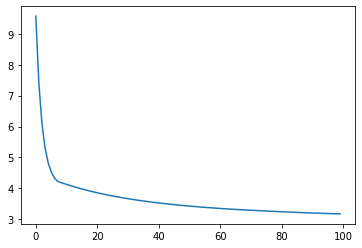

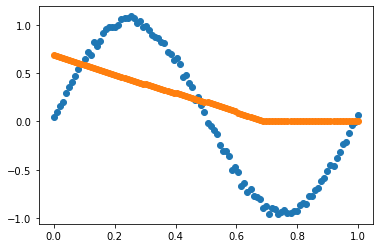

In [62]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, input_size):
        self.weights = Variable(torch.randn(1,input_size), requires_grad=True)
        self.bias = Variable(torch.randn(1), requires_grad=True)
    
    def forward(self, input):
        return torch.matmul(input, self.weights) + self.bias
    
class SquaredLoss:
    def forward(self, input, target):
        return torch.mean((input - target)**2)
    
class ReLU:
    def forward(self, inputt):
        for i in range(len(inputt)):
            for index, j in enumerate(inputt[i]):
                if inputt[i][index] < 0:
                    inputt[i][index] = 0
        return inputt

def train_neuron(neuron, optimizer, criterion, relu, x_train, y_train, num_epochs, batch_size):
    epochs_loss = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        y_p = []
        for i in range(0, len(X), batch_size):
            x_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            
            optimizer.zero_grad()
            y_pred = neuron.forward(x_batch)
            ReLU = relu.forward(y_pred)
            loss = criterion.forward(ReLU, y_batch)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            y_p.append(y_pred)
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))
        epochs_loss.append(epoch_loss)

    return (epochs_loss, y_p)
 
            
neuron = Neuron(input_size=1)
criterion = SquaredLoss()
relu = ReLU()
learning_rate = 0.01
optimizer = torch.optim.SGD([neuron.weights, neuron.bias], lr=learning_rate)

num_epochs = 100
batch_size = 10
train = train_neuron(neuron, optimizer, criterion, relu, X, y, num_epochs, batch_size)
epochs_loss = train[0]
y_pred = train[1]
print('Weights:', neuron.weights.data)
print('Bias:', neuron.bias.data)

plt.plot(epochs_loss)
plt.show()
y_pred  = [item for sublist in y_pred for item in sublist]
y_pred = torch.Tensor(y_pred)
plt.scatter(X,y)
plt.scatter(X,y_pred)

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [4]:
import torch.optim as optim

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [53]:
from sklearn.datasets import make_regression
import torch
from torchviz import make_dot
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [55]:
import torch
from torch.autograd import Variable

class Neuron:
    def __init__(self, input_size):
        self.weights = Variable(torch.randn(4,input_size), requires_grad=True)
        self.bias = Variable(torch.randn(1), requires_grad=True)
    
    def forward(self, input):
        return torch.matmul(input, self.weights) + self.bias
    
class SquaredLoss:
    def forward(self, input, target):
        return torch.mean((input - target)**2)

def train_neuron(neuron, optimizer, criterion, x_train, y_train, num_epochs, batch_size):
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for i in range(0, len(X), batch_size):
            x_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            
            optimizer.zero_grad()
            y_pred = neuron.forward(x_batch)
            loss = criterion.forward(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))
            
neuron = Neuron(input_size=10)
criterion = SquaredLoss()

learning_rate = 0.01
optimizer = torch.optim.SGD([neuron.weights, neuron.bias], lr=learning_rate)


num_epochs = 100
batch_size = 10
train_neuron(neuron, optimizer, criterion, X, y, num_epochs, batch_size)


print('Weights:', neuron.weights.data)
print('Bias:', neuron.bias.data)


Epoch [10/100], Loss: 198131.2285
Epoch [20/100], Loss: 195641.4570
Epoch [30/100], Loss: 194021.6875
Epoch [40/100], Loss: 192960.1484
Epoch [50/100], Loss: 192258.5801
Epoch [60/100], Loss: 191790.7031
Epoch [70/100], Loss: 191475.7207
Epoch [80/100], Loss: 191261.5938
Epoch [90/100], Loss: 191114.6143
Epoch [100/100], Loss: 191012.7314
Weights: tensor([[ 5.0531e+00,  2.0637e-02,  1.2797e+01,  1.0704e+01, -1.2599e+01,
          6.7357e+00, -8.2740e+00, -7.4710e+00,  4.8327e+01,  3.7130e+01],
        [-1.1730e+01,  7.5574e+00,  2.6817e+00,  2.1270e+00,  2.6042e+01,
          1.6994e+01,  2.2879e+00,  2.5372e+00,  9.6713e+00,  3.0335e+01],
        [ 1.7360e+01, -2.1832e+00, -6.3220e+00,  5.6947e+00,  1.7513e+00,
         -6.8500e-01,  1.0477e+00,  2.7395e+00,  2.1656e+01,  1.6391e+01],
        [ 3.3754e+00,  2.6455e+00, -9.0332e+00,  6.7778e+00, -1.0262e+00,
         -1.2082e+00, -6.2822e+00,  5.2920e+00,  4.0034e-01, -1.3676e+01]])
Bias: tensor([-2.1224])


3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [57]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

Epoch [10/100], Loss: 3.0994
Epoch [20/100], Loss: 3.0567
Epoch [30/100], Loss: 3.0550
Epoch [40/100], Loss: 3.0565
Epoch [50/100], Loss: 3.0580
Epoch [60/100], Loss: 3.0582
Epoch [70/100], Loss: 3.0595
Epoch [80/100], Loss: 3.0593
Epoch [90/100], Loss: 3.0604
Epoch [100/100], Loss: 3.0607
Weights: tensor([[-1.5553]])
Bias: tensor([0.9650])


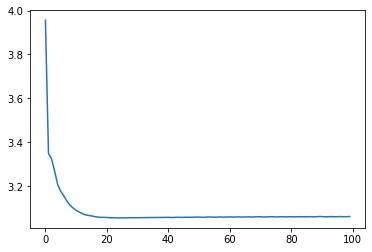

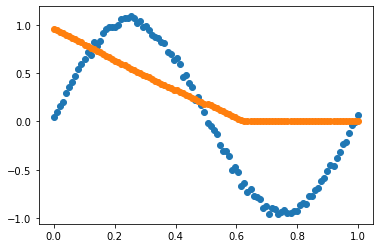

In [63]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, input_size):
        self.weights = Variable(torch.randn(1,input_size), requires_grad=True)
        self.bias = Variable(torch.randn(1), requires_grad=True)
    
    def forward(self, input):
        return torch.matmul(input, self.weights) + self.bias
    
class SquaredLoss:
    def forward(self, input, target):
        return torch.mean((input - target)**2)
    
class ReLU:
    def forward(self, inputt):
        for i in range(len(inputt)):
            for index, j in enumerate(inputt[i]):
                if inputt[i][index] < 0:
                    inputt[i][index] = 0
        return inputt

def train_neuron(neuron, optimizer, criterion, relu, x_train, y_train, num_epochs, batch_size):
    epochs_loss = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        y_p = []
        for i in range(0, len(X), batch_size):
            x_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            
            optimizer.zero_grad()
            y_pred = neuron.forward(x_batch)
            ReLU = relu.forward(y_pred)
            loss = criterion.forward(ReLU, y_batch)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            y_p.append(y_pred)
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))
        epochs_loss.append(epoch_loss)

    return (epochs_loss, y_p)
 
            
neuron = Neuron(input_size=1)
criterion = SquaredLoss()
relu = ReLU()
learning_rate = 0.01

optimizer = optim.Adam([neuron.weights, neuron.bias], lr=0.05)

num_epochs = 100
batch_size = 10
train = train_neuron(neuron, optimizer, criterion, relu, X, y, num_epochs, batch_size)
epochs_loss = train[0]
y_pred = train[1]
print('Weights:', neuron.weights.data)
print('Bias:', neuron.bias.data)

plt.plot(epochs_loss)
plt.show()
y_pred  = [item for sublist in y_pred for item in sublist]
y_pred = torch.Tensor(y_pred)
plt.scatter(X,y)
plt.scatter(X,y_pred)



## 3.3 Построение сетей при помощи `torch.nn`

In [3]:
import torch.nn as nn

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [65]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

Epoch [100/1000], Loss: 0.1675
Epoch [200/1000], Loss: 0.1650
Epoch [300/1000], Loss: 0.1622
Epoch [400/1000], Loss: 0.1584
Epoch [500/1000], Loss: 0.1535
Epoch [600/1000], Loss: 0.1493
Epoch [700/1000], Loss: 0.1468
Epoch [800/1000], Loss: 0.1456
Epoch [900/1000], Loss: 0.1451
Epoch [1000/1000], Loss: 0.1449


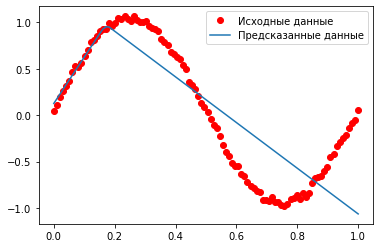

In [67]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt


input_dim = 1
output_dim = 1
hidden_dim = 10

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = torch.relu(self.fc1(x))
        out = self.fc2(out)
        return out

model = Net(input_dim, hidden_dim, output_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000

for epoch in range(num_epochs):
    optimizer.zero_grad()

    y_pred = model(X)
    
    loss = criterion(y_pred, y)

    loss.backward()

    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


model.eval()
with torch.no_grad():
    y_pred = model(X)


plt.plot(X.numpy(), y.numpy(), 'ro', label='Исходные данные')
plt.plot(X.numpy(), y_pred.numpy(), label='Предсказанные данные')
plt.legend()
plt.show()


3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [68]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

Epoch [100/1000], Loss: 0.1672
Epoch [200/1000], Loss: 0.1081
Epoch [300/1000], Loss: 0.0390
Epoch [400/1000], Loss: 0.0086
Epoch [500/1000], Loss: 0.0055
Epoch [600/1000], Loss: 0.0054
Epoch [700/1000], Loss: 0.0054
Epoch [800/1000], Loss: 0.0053
Epoch [900/1000], Loss: 0.0053
Epoch [1000/1000], Loss: 0.0053


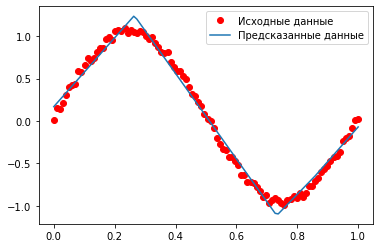

In [69]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt


input_dim = 1
output_dim = 1
hidden_dim = 10


model = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim)
)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


num_epochs = 1000

for epoch in range(num_epochs):
    optimizer.zero_grad()

    y_pred = model(X)

    loss = criterion(y_pred, y)

    loss.backward()

    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

model.eval()
with torch.no_grad():
    y_pred = model(X)

plt.plot(X.numpy(), y.numpy(), 'ro', label='Исходные данные')
plt.plot(X.numpy(), y_pred.numpy(), label='Предсказанные данные')
plt.legend()
plt.show()


## 3.4. Datasets and dataloaders

In [2]:
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [54]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [11]:
class SinDataset(Dataset):
    def __init__(self):
        self.x = torch.linspace(0, 1, 100).view(-1, 1)
        self.y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 
        self.n_samples = self.x.shape[0] 

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [12]:
dataset = SinDataset()

first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([0.]) tensor([0.0779])


In [20]:
dataloader = DataLoader(dataset=dataset, batch_size=10)
total_samples = len(dataset)
n_iterations = total_samples//10
print(total_samples, n_iterations)
inputt = []
for i, (targets, labels) in enumerate(dataloader):
    inputt.append(targets)
    inputt.append(labels)
    print(targets, labels)

100 10
tensor([[0.0000],
        [0.0101],
        [0.0202],
        [0.0303],
        [0.0404],
        [0.0505],
        [0.0606],
        [0.0707],
        [0.0808],
        [0.0909]]) tensor([[0.0779],
        [0.0861],
        [0.1699],
        [0.2638],
        [0.3086],
        [0.3236],
        [0.4341],
        [0.5279],
        [0.5312],
        [0.5517]])
tensor([[0.1010],
        [0.1111],
        [0.1212],
        [0.1313],
        [0.1414],
        [0.1515],
        [0.1616],
        [0.1717],
        [0.1818],
        [0.1919]]) tensor([[0.6518],
        [0.7117],
        [0.7390],
        [0.7410],
        [0.8708],
        [0.8218],
        [0.8789],
        [0.9350],
        [0.9367],
        [0.9942]])
tensor([[0.2020],
        [0.2121],
        [0.2222],
        [0.2323],
        [0.2424],
        [0.2525],
        [0.2626],
        [0.2727],
        [0.2828],
        [0.2929]]) tensor([[1.0048],
        [1.0683],
        [1.0249],
        [0.9942],
        [1.0667]

Epoch [100/1000], Loss: 0.1606
Epoch [200/1000], Loss: 0.1524
Epoch [300/1000], Loss: 0.1437
Epoch [400/1000], Loss: 0.1133
Epoch [500/1000], Loss: 0.0675
Epoch [600/1000], Loss: 0.0253
Epoch [700/1000], Loss: 0.0101
Epoch [800/1000], Loss: 0.0065
Epoch [900/1000], Loss: 0.0052
Epoch [1000/1000], Loss: 0.0046


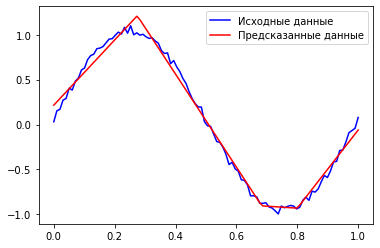

In [38]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt


input_dim = 1
output_dim = 1
hidden_dim = 10


model = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim)
)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


num_epochs = 1000

for epoch in range(num_epochs):
    optimizer.zero_grad()

    y_pred = model(X)

    loss = criterion(y_pred, y)

    loss.backward()

    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

model.eval()
with torch.no_grad():
    y_pred = model(X)

plt.plot(X.numpy(), y.numpy(), 'b', label='Исходные данные')
plt.plot(X.numpy(), y_pred.numpy(),'r', label='Предсказанные данные')
plt.legend()
plt.show()


3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


In [201]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

In [202]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [41]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf

,Unnamed: 0,carat,depth,table,price,x,y,z
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [163]:
X = newdf.drop(columns=['price'])
y = newdf['price']

In [164]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

In [165]:
train_size = int(len(df) * 0.6)
test_size = len(df) - train_size

train_dataset = TensorDataset(X[:train_size], y[:train_size])
test_dataset = TensorDataset(X[train_size:], y[train_size:])


In [180]:
batch_size = 256

train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


model = nn.Linear(X.shape[1], 1)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=10000)


train_losses = []
test_losses = []

for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0
    
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() 
    
    model.eval()
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item() 
    
    train_loss /= len(train_loader.dataset)
    test_loss /= len(test_loader.dataset)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    

    print(f'Epoch {epoch + 1}/{10} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}')


Epoch 1/10 | Train Loss: 35587.8383 | Test Loss: 441123.0089
Epoch 2/10 | Train Loss: 35233.6133 | Test Loss: 383576.9841
Epoch 3/10 | Train Loss: 34882.3608 | Test Loss: 330762.8821
Epoch 4/10 | Train Loss: 34532.4017 | Test Loss: 283113.4587
Epoch 5/10 | Train Loss: 34184.4692 | Test Loss: 240760.4836
Epoch 6/10 | Train Loss: 33838.9242 | Test Loss: 203747.2724
Epoch 7/10 | Train Loss: 33495.9883 | Test Loss: 172079.2494
Epoch 8/10 | Train Loss: 33155.8083 | Test Loss: 145741.7609
Epoch 9/10 | Train Loss: 32818.4842 | Test Loss: 124707.9938
Epoch 10/10 | Train Loss: 32484.0892 | Test Loss: 108943.2109


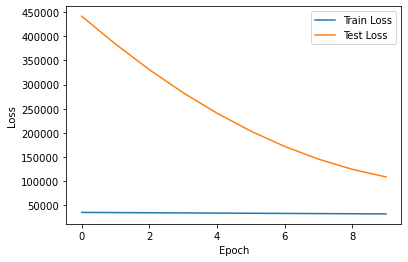

In [181]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [203]:
class DiamondsDataset(Dataset):
    def __init__(self, data, transform: callable = None):
        self.data = data
        self.X = data.drop(columns=["price"])
        self.transform = transform
        self.y = data.y

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        sample = self.X.iloc[idx], self.y.iloc[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

In [204]:
class DropColsTransform:
    def __init__(self, drop: list):
        self.drop = drop

    def __call__(self, sample):
        _X, _y = sample
        _X: pd.Series
        _X = _X.drop(self.drop)
        return _X.values, _y

In [205]:
class ToTensorTransform:
    def __call__(self, sample):
        _X, _y = sample
        return torch.tensor(list(_X)).float(), torch.tensor(_y).float()

In [206]:
from torchvision import transforms

drop = DropColsTransform(drop=["cut", "color", "clarity"])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset(df, transforms.Compose([drop, to_tensor]))
train_data, test_data = torch.utils.data.random_split(dataset, [len(dataset) - test_size, test_size])

In [209]:
model = torch.nn.Sequential(
    torch.nn.BatchNorm1d(7),
    torch.nn.Linear(7, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 1)
)

optimizer = torch.optim.Adam(model.parameters(), 0.01)
loss = torch.nn.MSELoss()
losses = []


for i in range(11):
    epoch_loss = 0
    for j, (x, y) in enumerate(DataLoader(train_data, batch_size=256), 1):
        y_pred = model(x)
        data_loss = loss(y_pred.flatten(), y.flatten())
        data_loss.backward()
        epoch_loss += data_loss.item()

        with torch.no_grad():
            optimizer.step()
            model.zero_grad()

    losses.append(epoch_loss / j)
    if i % 2 == 0:
        print(f"Epoch {i}: {epoch_loss / j:.4f}")

Epoch 0: 1.2193
Epoch 2: 0.0542
Epoch 4: 0.0495
Epoch 6: 0.0482
Epoch 8: 0.0458
Epoch 10: 0.0426
